In [1]:
import numpy as np
loc = 'data/cifar.100_loc.npz'
fin = np.load(loc);
input_locations =fin['loc']
input_locations = input_locations.astype(np.float);

In [2]:
from sklearn.cluster import KMeans
label_num = 256;
locations_list = []
index_list = [];
locations = input_locations
locations_list.append(locations);
cfgs = [4,4,4,4]

In [3]:
for cfg in cfgs:
    m = label_num/cfg;
    kmeans = KMeans(n_clusters=m, random_state=0)
    results = kmeans.fit(locations);
    label_count = [0 for i in range(m)];
    for i in range(label_num):
        label_count[results.labels_[i]] += 1;
    maximum = (max(label_count));
    label_count = [0 for i in range(m)];
    index = np.ones((m, maximum)) * label_num;
    for i in range(label_num):
        id = results.labels_[i];
        index[id][label_count[id]] = i;
        label_count[id] += 1;
    new_locations = results.cluster_centers_;
    locations_list.append(new_locations);
    index_list.append(index);
    locations = new_locations;
    label_num = m;

In [4]:
np.savez('data/cifar25_sparse.npz', locations = locations_list, index=index_list);

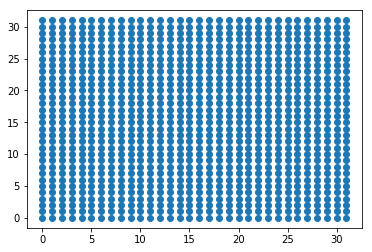

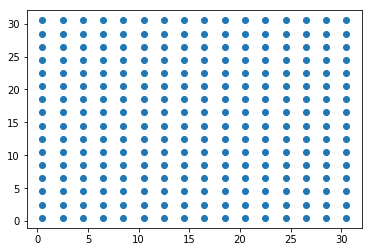

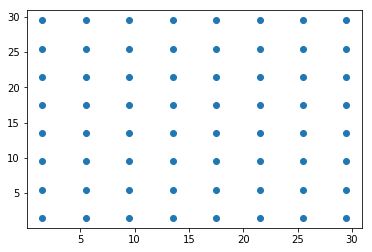

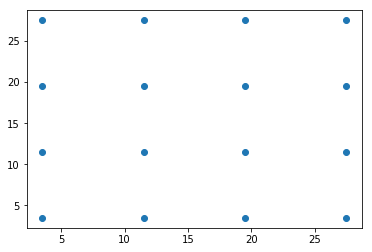

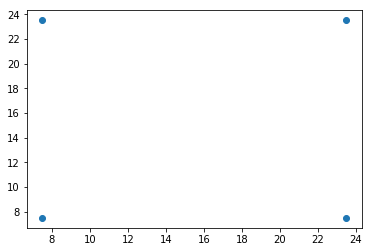

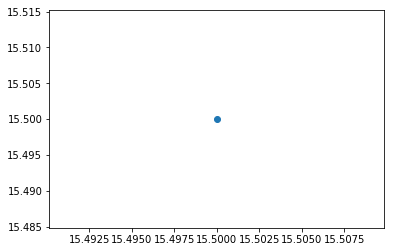

In [18]:
import matplotlib.pyplot as plt
x = 0;
for locations in locations_list:
    plt.figure(x)
    plt.scatter(locations[:,0], locations[:,1]);
    plt.show()
    x += 1;

In [20]:
def eq(loc, x, y):
    if (loc[0] == x and loc[1] == y):
        return True;
    return False;
    
locations = input_locations
label_num = 1024;
locations_list = [locations]
index_list = [];
x = 0;
y = 0;
interval = 1.;
end = 32;
for i in range(5):
    label_num = label_num / 4;
    index = np.zeros((label_num, 4));
    locations_ = np.zeros((label_num, 2))
    tag0 = 0;
    next_interval = interval * 2;
    while (x < 32):
        tag1 = 0;
        for k in range(len(locations)):
            if (eq(locations[k], x, y)):
                index[tag0][tag1] = k;
                tag1 += 1;
            if (eq(locations[k], x, y + interval)):
                index[tag0][tag1] = k;
                tag1 += 1;
            if (eq(locations[k], x + interval, y)):
                index[tag0][tag1] = k;
                tag1 += 1;
            if (eq(locations[k], x + interval, y + interval)):
                index[tag0][tag1] = k;
                tag1 += 1;
        locations_[tag0][0] = x + interval/2;
        locations_[tag0][1] = y + interval/2;
        tag0 += 1;
        y = y + next_interval;
        if (y >= 32):
            y = y - 32;
            x = x + next_interval;
    index_list.append(index);
    locations_list.append(locations_);
    locations = locations_;
    x, y = locations[0][0], locations[0][1];
    interval = next_interval;
np.savez('data/cifar100_sparse.npz', locations = locations_list, index=index_list);

In [22]:
print(index_list[0][0])
print(index_list[1][0])

[ 178.  267.  914.  963.]
[  0.   1.  16.  17.]
